<a href="https://colab.research.google.com/github/vijaynadimpalli/USAirplaneDataAnalysis/blob/main/AirplaneDelayAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas==1.1.1

     |████████████████████████████████| 10.5MB 2.7MB/s 
  Found existing installation: pandas 1.1.4
    Uninstalling pandas-1.1.4:
      Successfully uninstalled pandas-1.1.4


In [2]:
# #kaggle DataSet
 
# !mkdir ~/.kaggle
# ! cp /content/drive/'My Drive'/NEW_DATASCIENCE_PROJECTS/kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
 
# !kaggle datasets download -d tylerx/flights-and-airports-data
 
# from zipfile import ZipFile
 
# ZipFile('/content/flights-and-airports-data.zip').extractall()
 
# import pandas as pd
# import numpy as np
# import seaborn as sns
 
# df = pd.read_csv('flights.csv')

Downloadidng Data frm transstats dataset...
 https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time

Download link :: https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2000_2.zip

In [3]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=fcc28cba980c5c3e19faf546a9c2ce9d68ad829bf50e7777b97276e6f7cba94d
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


Memory Optimization is extremely important when dealing with big data....
https://www.dataquest.io/blog/pandas-big-data/
Great Article which explains in detail the memory optimization process....

Also for big data Flask can be used to efficienty read huge amounts of data..
Research on this....

Adding dtypes which decrease the size dramatically ... 
For reference :: https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e

Below method is a streamlined datatype converter post read_csv to get the best dtypes.These dtypes are manually added to read_csv later.
The conversion process below is a one-time thing.
 For reference :: https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [5]:
# def floatconversion(data):
#  floatcol=[X for X in data.dtypes.index if data.dtypes[X]=='float64']
#  for col in floatcol:
#   data.loc[:,col]=pd.to_numeric(data.loc[:,col],downcast='float')
#  return data 
 
 
# def intconversion(data):
#  intcol=[X for X in data.dtypes.index if data.dtypes[X]=='int64']
#  for col in intcol:
#   data.loc[:,col]=pd.to_numeric(data.loc[:,col],downcast='integer')
#  return data 
 
# def catconversion(data):
#  catcol=[X for X in data.dtypes.index if data.dtypes[X]=='object']
#  for col in catcol:
#   num_unique_values = len(data[col].unique())
#   num_total_values = len(data[col])
#   if num_unique_values / num_total_values < 0.5:
#     data.loc[:,col] = data[col].astype('category')
#   else:
#     data.loc[:,col] = data[col]
#  return data 
 
 
# def dtypeconversion(data):
#  floatconversion(data)
#  intconversion(data)
#  catconversion(data)
#  return data 
 
# ##test steps
# df=dtypeconversion(df) #df is your dataframe which needs dtype conversion.

# create the dict of index names and optimized datatypes
# dtypes = df.dtypes
# colnames = dtypes.index
# types = [i.name for i in dtypes.values]
# column_types = dict(zip(colnames, types))

In [6]:
file_prefix = "On_Time_Reporting_Carrier_On_Time_Performance_1987_present_"
csv_prefix = "On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_"

remove_cols = ['DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline','Flight_Number_Reporting_Airline','OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID','OriginStateFips','OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 
       'DestStateFips', 'DestWac','FirstDepTime', 'TotalAddGTime',
       'LongestAddGTime','Flights']
#List of cols to be Removed, which i felt were unnecessary for now....


#Pandas does not support NaN values on int64 or bool(because NaN is a float), so you need to use Int64 or float64 or boolean
#also putting every column as float16 is causing white bars in seaborn plots so not recommended..
#pandas convert_dtypes() automatically converts to nullable dtypes. i.e floats with NaN will be converted to Int  
#but seaborn does not recognize Int64 datatype for now...so convert_dtypes is useless
#https://github.com/mwaskom/seaborn/issues/1971


cols_for_dtype = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Tail_Number', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']
 #list of cols for type change(all columns including object cols)

 #the dtype values below were chosen by running the dtypeconversion code commented out above
col_dtype=['int16', 'int8', 'int8', 'int8', 'int8', 'category',
 'category','category','category','category','category','category','category',
 'category','category','int16','float32','float32','float32','float32','float32',
 'category','float32','float32','float32','float32','int16','float32','float32',
 'float32','float32','float32','category','float32','category','float32','float32',
 'float32','float32','float32','int8','float32','float32','float32','float32',
 'float32']



type_dict = dict(zip(cols_for_dtype,col_dtype))

print(len(cols_for_dtype))
print(len(col_dtype))

46
46


In [7]:
import wget
from zipfile import ZipFile
import os
from os import path
import pandas as pd


def col_checker(x):
  if x in remove_cols:
    #print('Removed column : '+ x)
    return False
  if x=='Diverted':
    return True
  if x[0:3]=='Div':
    return False  
  return True


def download_extract(year_month):
  token = file_prefix  + year_month
  if os.path.exists(csv_prefix + year_month + ".csv"):
    print("File Already Exists!")
    return
  wget.download("https://transtats.bts.gov/PREZIP/"+token+".zip")
  ZipFile(token + ".zip").extractall()
  os.remove(token + ".zip")
  os.remove("readme.html")


def run_all_downloads():
  all_files = []
  year = 2019
  for month in range(1,13):
    year_month = str(year)+"_"+str(month)
    download_extract(year_month)
    all_files.append(csv_prefix + year_month + ".csv")
  return all_files


files = run_all_downloads()
#takes 15 minutes to download 1 year of data

df = pd.concat([pd.read_csv(x,usecols=col_checker,dtype=type_dict,parse_dates=['FlightDate']) for x in files],axis=0)
print("DONE*************")
#df['DepartureDelayGroups'] = df['DepartureDelayGroups'].apply(lambda x : (15*x,15*(x+1))).astype('category')
print("DONE*************")
#df['ArrivalDelayGroups'] = df['ArrivalDelayGroups'].apply(lambda x : (15*x,15*(x+1))).astype('category')
df.reset_index(inplace=True,drop=True)
df.dropna(how='all', axis='columns',inplace=True) # removing Unnamed: 109 columns which has all NaN values

#df.to_csv("2019_complete.csv",index=False)
#takes 5 minutes to concat and save as csv file.. 2.1GB final size

DONE*************
DONE*************


In [8]:
#Looking at the memory consumption of the dataset...
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422037 entries, 0 to 7422036
Data columns (total 47 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Year                  int16         
 1   Quarter               int8          
 2   Month                 int8          
 3   DayofMonth            int8          
 4   DayOfWeek             int8          
 5   FlightDate            datetime64[ns]
 6   Reporting_Airline     category      
 7   Tail_Number           object        
 8   Origin                object        
 9   OriginCityName        object        
 10  OriginState           category      
 11  OriginStateName       category      
 12  Dest                  object        
 13  DestCityName          object        
 14  DestState             category      
 15  DestStateName         category      
 16  CRSDepTime            int16         
 17  DepTime               float32       
 18  DepDelay              float32       
 19  

In [9]:
#Amount of null values present in the data....
df.isna().sum()

Year                          0
Quarter                       0
Month                         0
DayofMonth                    0
DayOfWeek                     0
FlightDate                    0
Reporting_Airline             0
Tail_Number               17837
Origin                        0
OriginCityName                0
OriginState                   0
OriginStateName               0
Dest                          0
DestCityName                  0
DestState                     0
DestStateName                 0
CRSDepTime                    0
DepTime                  130086
DepDelay                 130110
DepDelayMinutes          130110
DepDel15                 130110
DepartureDelayGroups     130110
DepTimeBlk                    0
TaxiOut                  133977
WheelsOff                133977
WheelsOn                 137647
TaxiIn                   137647
CRSArrTime                    0
ArrTime                  137646
ArrDelay                 153805
ArrDelayMinutes          153805
ArrDel15

In [10]:
# import numpy as np
# print(np.finfo('float16'))
# print(np.iinfo('int16'))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


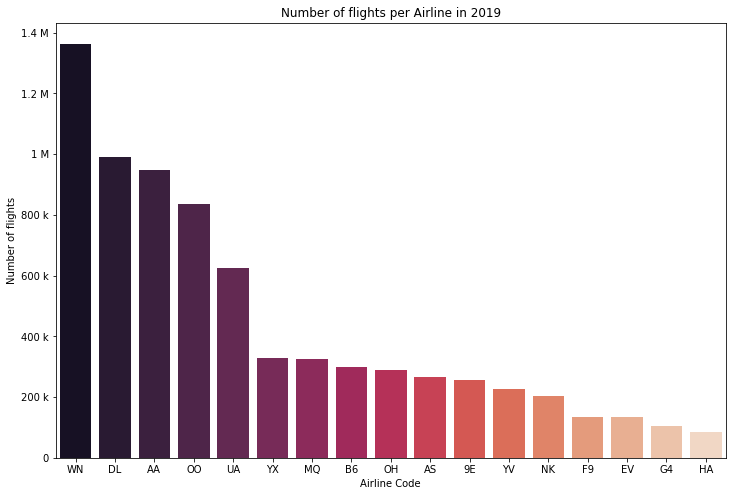

In [38]:
#Looking at the most popular airlines....
from matplotlib import ticker

plt.figure(figsize=(12,8))
ax=sns.countplot(df['Reporting_Airline'],palette='rocket',order=df['Reporting_Airline'].value_counts().index)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel("Airline Code")
plt.ylabel("Number of flights")
plt.title("Number of flights per Airline in 2019");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


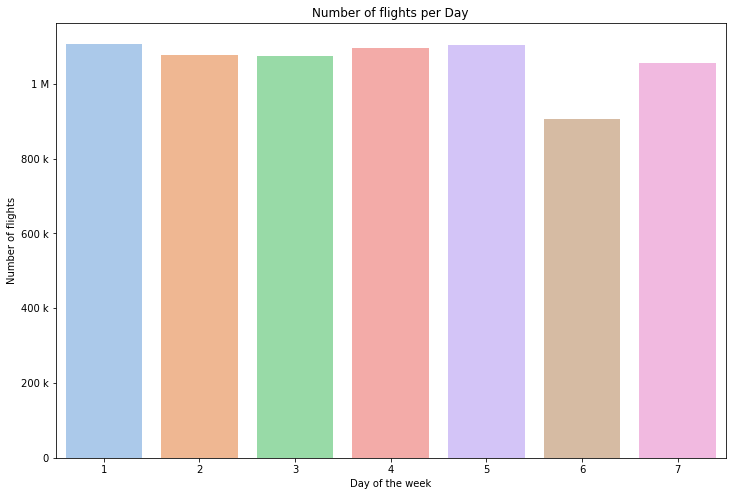

In [40]:
plt.figure(figsize=(12,8))
ax=sns.countplot(df['DayOfWeek'],palette='pastel')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel("Day of the week")
plt.ylabel("Number of flights")
plt.title("Number of flights per Day");

In [42]:
#States in US with highest number of flight departures
df['OriginStateName'].value_counts()

California                                        814858
Texas                                             803314
Florida                                           585430
Illinois                                          443060
Georgia                                           421768
New York                                          389436
North Carolina                                    341094
Colorado                                          282450
Virginia                                          271091
Arizona                                           204998
Michigan                                          203439
Pennsylvania                                      188551
Nevada                                            184718
Minnesota                                         170585
Washington                                        161350
Massachusetts                                     153634
New Jersey                                        142205
Tennessee                      

In [12]:
#Airlines with the highest number of delays...
df.groupby(by='Reporting_Airline')['DepDelay','ArrDelay'].mean().sort_values(by=['DepDelay','ArrDelay'],ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,DepDelay,ArrDelay
Reporting_Airline,,
B6,17.745474,11.223515
EV,17.214006,15.506803
F9,14.577009,8.715867
YV,13.803164,10.464875
UA,13.004563,8.289444
OO,12.564054,7.184953
AA,12.114915,6.965412
NK,10.940950,5.103484
OH,10.704734,6.706320


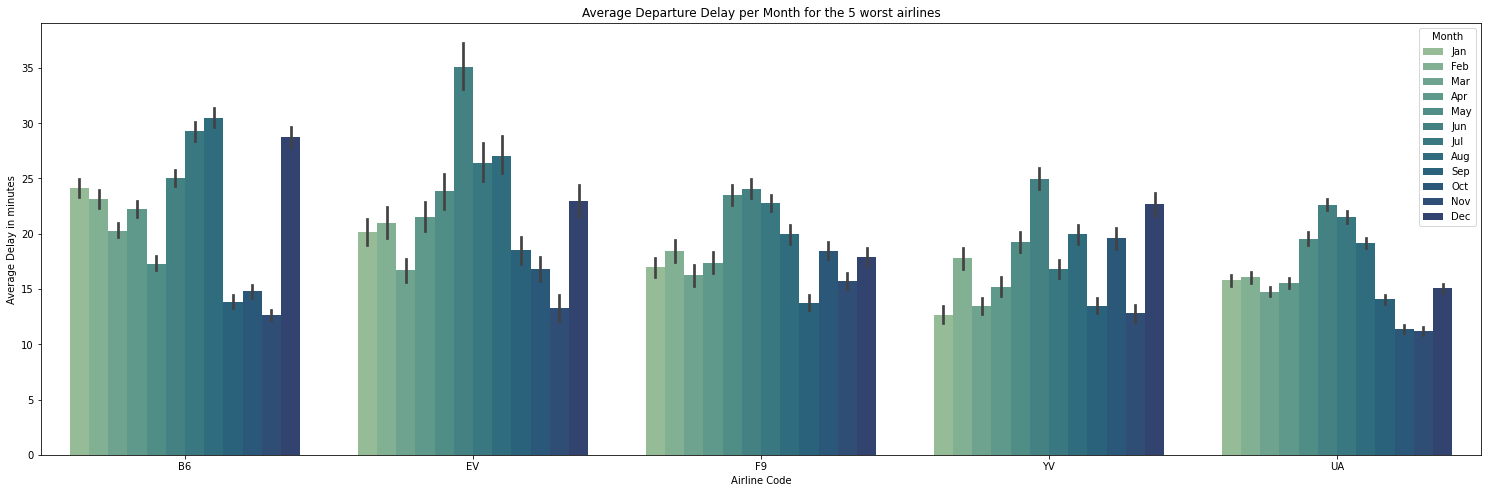

In [13]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
sns.barplot(ax=ax,x='Reporting_Airline',y='DepDelayMinutes',data=df,hue='Month',order=df.groupby(by='Reporting_Airline')[['DepDelay']].mean().sort_values(by=['DepDelay'],ascending=False).index[:5],palette='crest')
new_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=new_labels,title='Month')
plt.xlabel("Airline Code")
plt.ylabel("Average Delay in minutes")
plt.title("Average Departure Delay per Month for the 5 worst airlines");

Text(0.5, 1.0, 'Departure Delay in Minutes per Month for all flights')

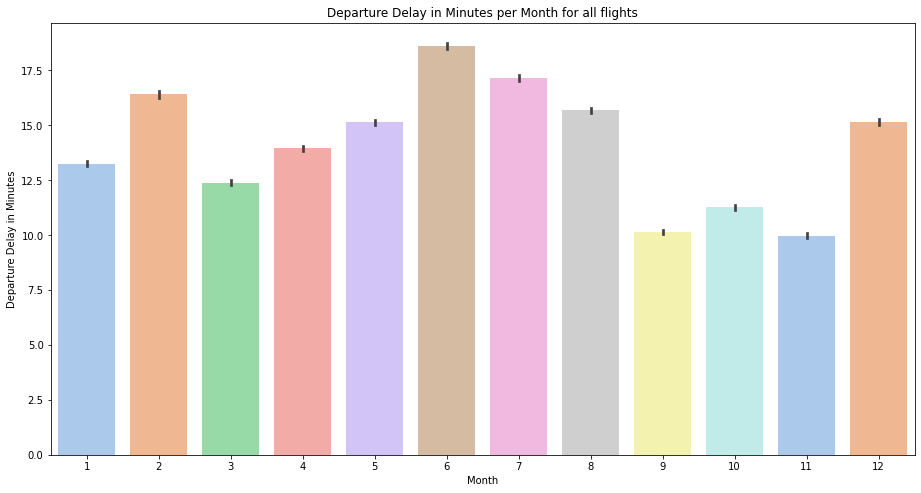

In [14]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
sns.barplot(ax=ax,x='Month',data=df,y='DepDelayMinutes',edgecolor='none',palette='pastel')
ax.set_xlabel('Month')
ax.set_ylabel('Departure Delay in Minutes')
ax.set_title('Departure Delay in Minutes per Month for all flights')

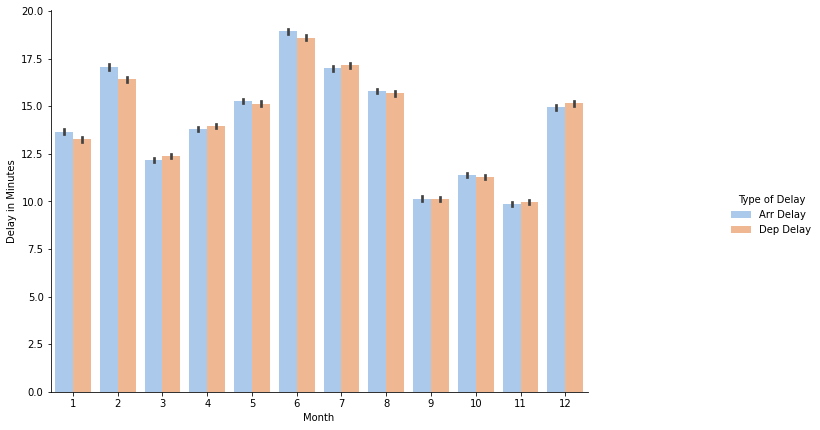

In [15]:
g=sns.catplot(data=pd.melt(df[['ArrDelayMinutes','DepDelayMinutes','Month']],id_vars=['Month']),kind='bar',x='Month',hue='variable',y='value',palette='pastel')
g.fig.set_figwidth(12)
g.fig.set_figheight(6)
legend = g._legend
legend.set_title("Type of Delay")
for t, l in zip(legend.texts,("Arr Delay", "Dep Delay")):
    t.set_text(l)


g.set_titles('Delay in Minutes per Month')
g.set_xlabels('Month')
g.set_ylabels('Delay in Minutes');

In [16]:
#df.dtypes.values

In [17]:
print(df[['Tail_Number']].value_counts()[:10])
#Top 10 Most flown flights

Tail_Number
N485HA         3697
N492HA         3608
N481HA         3596
N480HA         3587
N490HA         3485
N483HA         3483
N489HA         3447
N487HA         3299
N488HA         3289
N478HA         3215
dtype: int64


In [18]:
df.groupby(by=['OriginCityName','DestCityName'])['Year'].count().sort_values(ascending=False)[:20]
#Top 20 Busiest Routes

OriginCityName     DestCityName     
Chicago, IL        New York, NY         19876
New York, NY       Chicago, IL          19869
                   Boston, MA           15806
Boston, MA         New York, NY         15749
Los Angeles, CA    San Francisco, CA    14630
San Francisco, CA  Los Angeles, CA      14614
Atlanta, GA        New York, NY         13008
New York, NY       Atlanta, GA          13006
Los Angeles, CA    New York, NY         12862
New York, NY       Los Angeles, CA      12804
Atlanta, GA        Chicago, IL          12008
Washington, DC     Chicago, IL          11982
Chicago, IL        Washington, DC       11978
                   Minneapolis, MN      11924
Minneapolis, MN    Chicago, IL          11902
Chicago, IL        Atlanta, GA          11899
Los Angeles, CA    Las Vegas, NV        11722
Las Vegas, NV      Los Angeles, CA      11718
Atlanta, GA        Washington, DC       11522
Washington, DC     Atlanta, GA          11502
Name: Year, dtype: int64

In [19]:
#does dep delay contribute to arr delay...
#aiprot with most delays..
#airline with most delays...
#corr() for delays with other factors...
#Types of delays...
#Cancelled statistics...

#Route wise monthly dist of num of flights for top 5 busiest routes
#filling delay using monthly average of particular routes..
#and using traffic at that airport at that particular time to predict delay...
#analysing passenger capacity and occupancy on flights using a different dataset...
#time wise and datewise passenger occupany analysis, categorise according to flight type
#airpots with most arrival routes and busiest

In [20]:
#print(df['Cancelled'].value_counts())
#Statistics for number of cancellations...
#Percent of cancelled flights

print("Percentage of cancelled flights : %.2f" %(100*df['Cancelled'].value_counts()[1]/(df['Cancelled'].value_counts()[1]+df['Cancelled'].value_counts()[0])))

Percentage of cancelled flights : 1.82


In [21]:
df[['Origin']].value_counts()[:10]
#Top 10 busiest airports

Origin
ATL       395009
ORD       339606
DFW       304344
DEN       252026
CLT       235496
LAX       219952
IAH       179688
PHX       175328
LGA       171665
SFO       170918
dtype: int64

In [22]:
# df['DepTime'].isna().sum()

                                   Month  Count
OriginCityName  DestCityName                   
Atlanta, GA     New York, NY           1   1062
                New York, NY           2    956
                New York, NY           3   1138
                New York, NY           4   1108
                New York, NY           5   1121
                New York, NY           6   1095
                New York, NY           7   1124
                New York, NY           8   1142
                New York, NY           9   1060
                New York, NY          10   1099
                New York, NY          11   1035
                New York, NY          12   1068
Chicago, IL     New York, NY           1   1651
                New York, NY           2   1585
                New York, NY           3   1750
                New York, NY           4   1720
                New York, NY           5   1752
                New York, NY           6   1687
                New York, NY           7

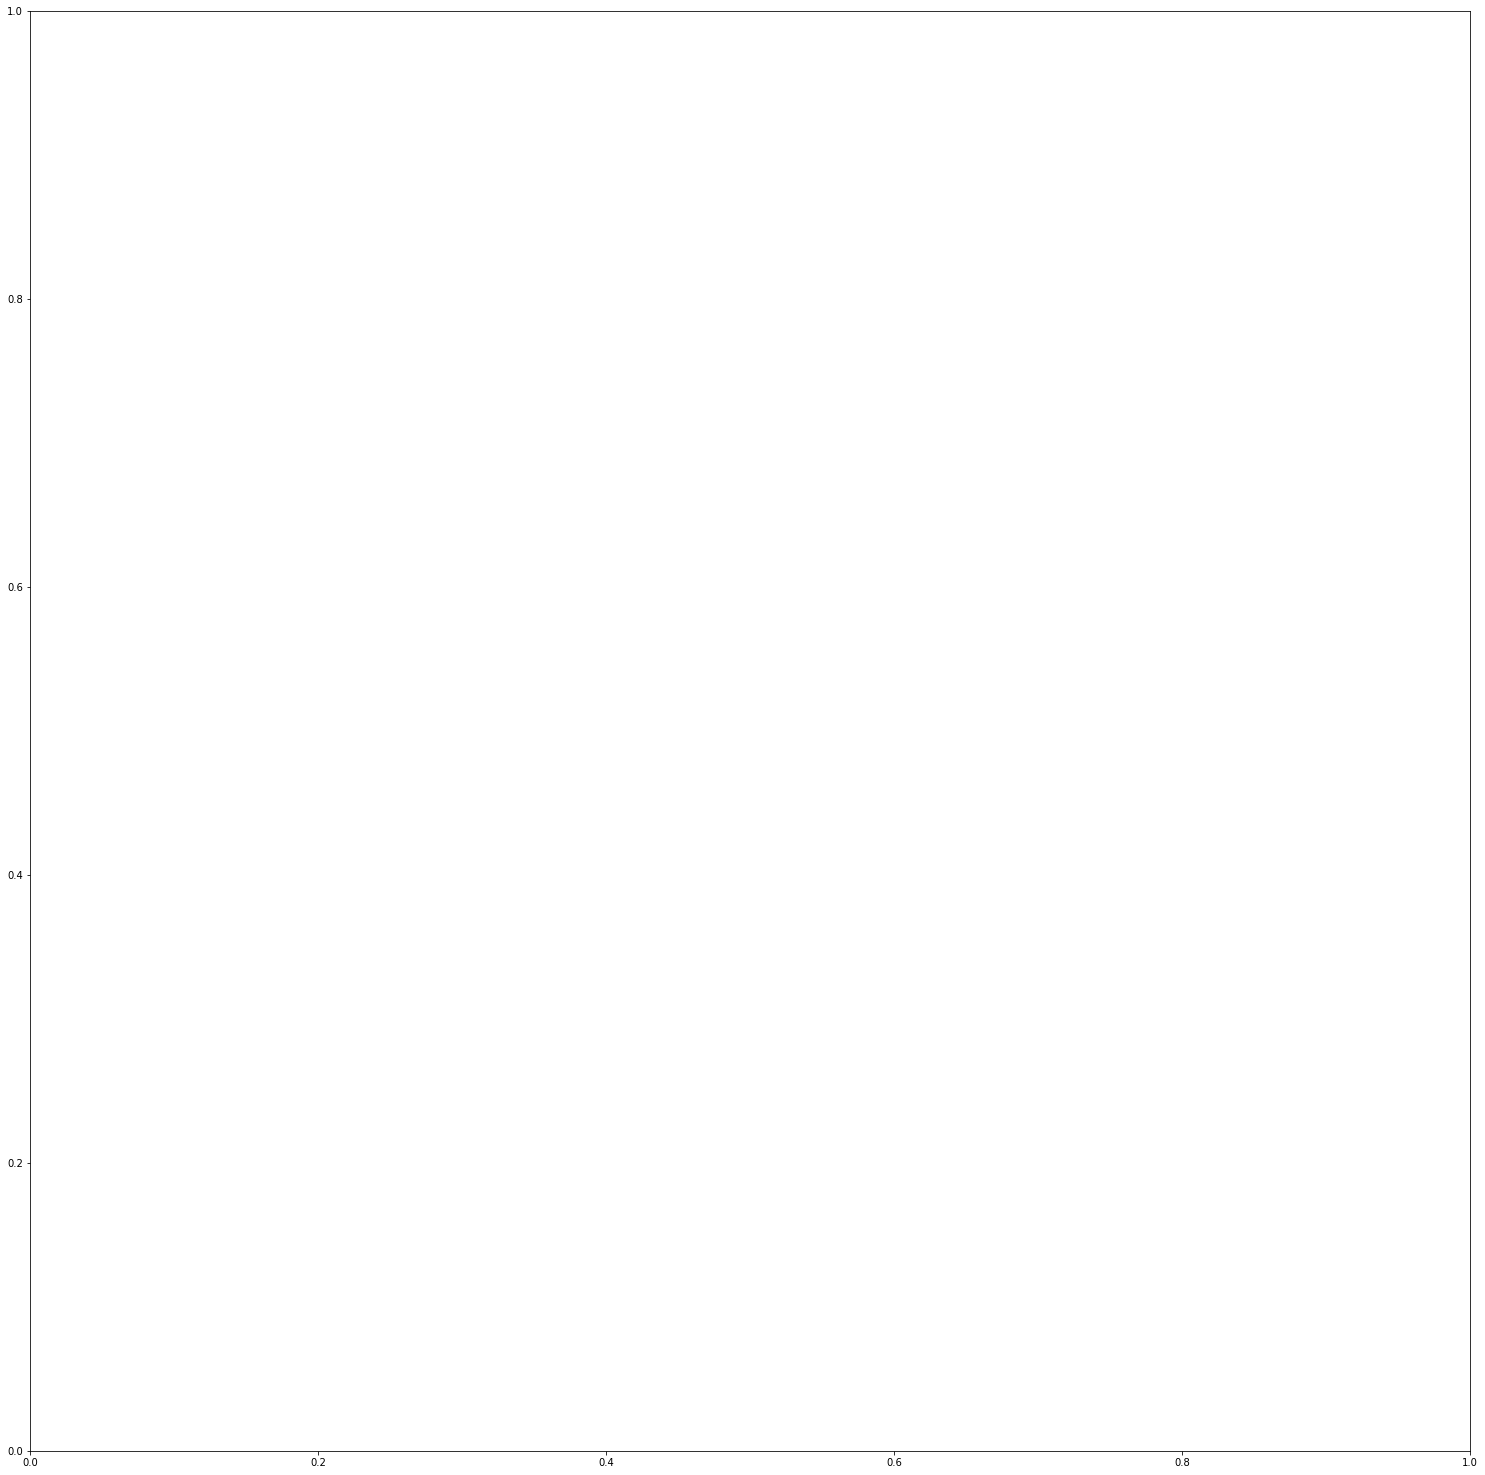

In [23]:
ind=df.groupby(by=['OriginCityName','DestCityName'])['Year'].count().sort_values(ascending=False).index[:10:2]
ind1=df.groupby(by=['OriginCityName','DestCityName'])['Year'].count().sort_values(ascending=False).index[1:10:2]

#print(ind)
# start = ind.get_level_values('OriginCityName')
# end = ind.get_level_values('DestCityName')
# print(start)
# print(end)


dat=df.groupby(by=['OriginCityName','DestCityName','Month'])[['Year']].count().reset_index(2).rename({'Year':'Count'},axis=1).loc[lambda df:df.apply(lambda x: x.name in ind,axis=1),:]
print(dat)
dat1=df.groupby(by=['OriginCityName','DestCityName','Month'])[['Year']].count().reset_index(2).rename({'Year':'Count'},axis=1).loc[lambda df:df.apply(lambda x: x.name in ind1,axis=1),:]
fig, axs = plt.subplots(2, 1, figsize=(20,20))
ax=fig.add_axes([0,0,1,1])
# print(axs.shape)
# sns.barplot(x=dat.index,y=dat['Count'],hue=dat['Month'],palette='Set3',ax=axs[0])
# axs[0].set_title("monthly dist of num of flights for top 5 busiest routes")
# sns.barplot(x=dat1.index,y=dat1['Count'],hue=dat1['Month'],palette='Set3',ax=axs[1])

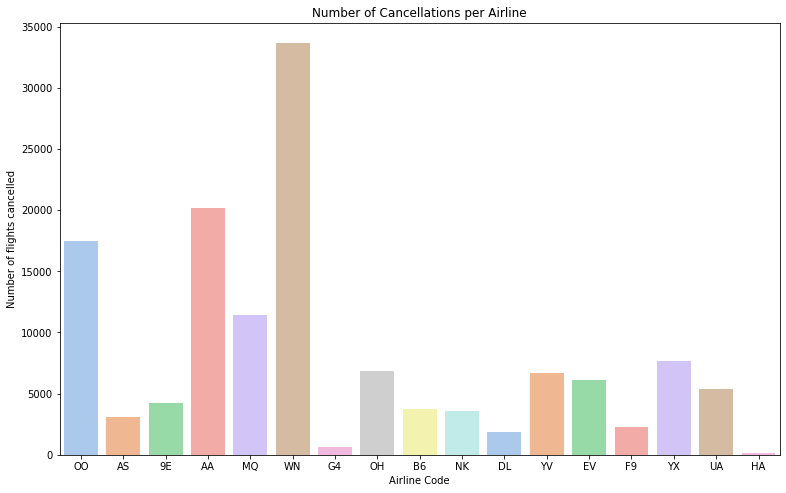

In [24]:
#Airline Cancellations record
fig=plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(ax=ax,x='Reporting_Airline',data=df.loc[df['Cancelled']==1,:],palette='pastel')
ax.set_title('Number of Cancellations per Airline')
ax.set_xlabel('Airline Code')
ax.set_ylabel('Number of flights cancelled');

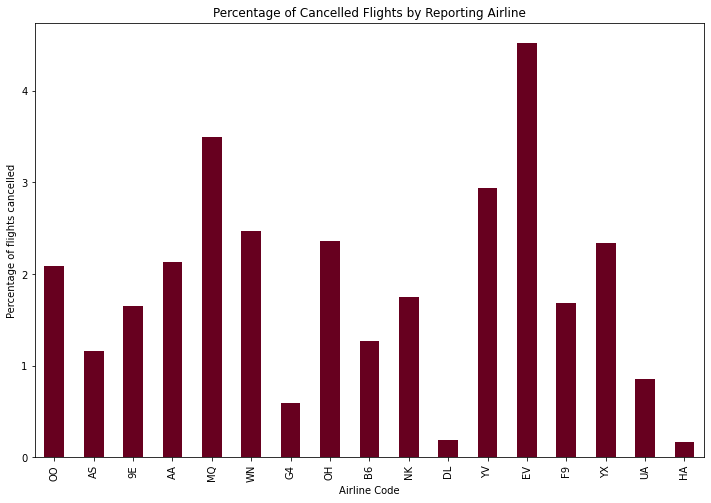

In [25]:
ax=(df.loc[df['Cancelled']==1,:].groupby(by='Reporting_Airline')['Year'].count()*100 / df.groupby(by='Reporting_Airline')['Year'].count()).plot(kind='bar',figsize=(12,8),cmap='RdGy')
ax.set_title("Percentage of Cancelled Flights by Reporting Airline");
ax.set_xlabel('Airline Code')
ax.set_ylabel('Percentage of flights cancelled');

In [26]:
# df.loc[0:1000,['OriginCityName','DestCityName']].apply(lambda x:[min(x['OriginCityName'],x['DestCityName']),max(x['OriginCityName'],x['DestCityName'])],axis=1)

In [27]:
#look at difference between using .loc and using two bracksts like df[][]
#Extremely Improtant read documentation...
#.loc is always preferred to chained indexing...
#[] returns a lower order slice.. not a dataframe
test = df[0:1000]
print(type(test))

<class 'pandas.core.frame.DataFrame'>


In [28]:
#pandas where and mask
#transform vs apply https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/


In [29]:
#Airports with highest departure avg delays in minutes

df.groupby(by='OriginCityName')[['DepDelayMinutes']].mean().sort_values(by='DepDelayMinutes',ascending=False).rename({'DepDelayMinutes':"Avg Departure Delay"},axis=1)[:10]

,Avg Departure Delay
OriginCityName,
"North Bend/Coos Bay, OR",38.171745
"Mammoth Lakes, CA",35.853657
"Meridian, MS",34.480423
"Hyannis, MA",33.542168
"Nantucket, MA",33.289906
"Jamestown, ND",32.699135
"Hancock/Houghton, MI",31.379259
"Eagle, CO",31.358860
"Salina, KS",30.712389


In [30]:
#Airports with highest arrival avg delays in minutes
df.groupby(by='DestCityName')[['ArrDelayMinutes']].mean().sort_values(by='ArrDelayMinutes',ascending=False).rename({'ArrDelayMinutes':"Avg Arrival Delay"},axis=1)[:10]

,Avg Arrival Delay
DestCityName,
"Ogdensburg, NY",32.026211
"Staunton, VA",30.581259
"Devils Lake, ND",29.673504
"Marquette, MI",29.200293
"Laramie, WY",27.816326
"Meridian, MS",26.943975
"Quincy, IL",26.710884
"Newark, NJ",26.603657
"Salina, KS",26.084257


In [31]:
# # col1 = df.groupby(by='OriginCityName')[['TaxiOut']].mean().sort_values(by='TaxiOut',ascending=False)
# # col2 = df.groupby(by='OriginCityName')[['Year']].count().sort_values(by='Year',ascending=False)

# col1 = df.groupby(by='OriginCityName')[['TaxiOut']].mean()
# col2 = df.groupby(by='OriginCityName')[['Year']].count()
# col = pd.concat([col1,col2],axis=1)
# col = col.reset_index(drop=True)
# sns.scatterplot(data=col/col.max())

In [32]:
df.corr()

,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarter,NaN,1.000000,0.970532,0.005507,-0.005224,-0.000297,-0.002841,-0.016102,-0.016202,-0.020987,-0.020884,-0.020188,-0.003709,-0.009196,0.009791,-0.010532,-0.009261,-0.021498,-0.018875,-0.026449,-0.027541,-0.045986,-0.003699,-0.007084,-0.012462,-0.010845,-0.001430,-0.001441,0.001062,-0.012515,-0.007644,-0.003331,-0.003503
Month,NaN,0.970532,1.000000,0.004140,0.005966,-0.000009,-0.002244,-0.015004,-0.015440,-0.018633,-0.019130,-0.020165,-0.003218,-0.009200,0.009887,-0.010770,-0.009336,-0.020403,-0.018191,-0.024522,-0.025963,-0.047177,-0.003743,-0.006243,-0.011678,-0.010051,-0.000789,-0.000820,0.001000,-0.014576,-0.010293,-0.002341,-0.002578
DayofMonth,NaN,0.005507,0.004140,1.000000,0.007803,-0.001098,-0.001390,0.002593,0.002282,0.001518,0.002965,-0.000240,-0.001565,-0.002962,0.001268,-0.002121,-0.002903,0.001180,0.001778,0.001154,0.001186,0.009042,0.000826,0.002701,0.002329,0.002329,0.002441,0.002387,-0.000805,0.002652,0.007097,-0.005192,-0.000164
DayOfWeek,NaN,-0.005224,0.005966,0.007803,1.000000,0.004656,0.003060,0.000108,-0.000497,-0.000653,-0.001027,-0.018933,0.002039,0.002120,0.006795,0.003600,0.002126,-0.002702,-0.001307,-0.003249,-0.004358,-0.006883,0.002243,0.012035,0.009861,0.012250,0.014111,0.014063,0.011140,0.004843,-0.013017,0.004920,-0.004659
CRSDepTime,NaN,-0.000297,-0.000009,-0.001098,0.004656,1.000000,0.955878,0.098560,0.093044,0.165288,0.137207,0.001504,0.929004,0.625651,-0.041854,0.683573,0.595320,0.093351,0.082713,0.136379,0.121697,0.016146,0.000916,-0.019527,-0.019208,-0.016306,-0.010483,-0.011529,-0.053511,-0.003581,-0.048808,-0.006023,0.123247
DepTime,NaN,-0.002841,-0.002244,-0.001390,0.003060,0.955878,1.000000,0.129090,0.121809,0.213740,0.192266,0.011986,0.970380,0.650660,-0.037224,0.683586,0.619364,0.124973,0.111338,0.180332,0.174304,0.009225,0.002827,-0.022660,-0.021384,-0.020423,-0.016014,-0.017042,-0.057970,-0.026067,-0.027923,-0.002186,0.142550
DepDelay,NaN,-0.016102,-0.015004,0.002593,0.000108,0.098560,0.129090,1.000000,0.997411,0.582207,0.852087,0.066767,0.119031,0.025410,0.014813,0.084275,0.018065,0.963505,0.974480,0.535807,0.800920,0.025973,0.017937,0.019050,0.024560,0.014564,0.013826,0.013696,0.644940,0.305893,0.201179,0.023587,0.508841
DepDelayMinutes,NaN,-0.016202,-0.015440,0.002282,-0.000497,0.093044,0.121809,0.997411,1.000000,0.563300,0.838494,0.065457,0.111910,0.019479,0.020051,0.078866,0.012576,0.961280,0.978153,0.520056,0.789345,0.025689,0.017364,0.014463,0.020153,0.009751,0.008608,0.008528,0.645729,0.306448,0.203352,0.023530,0.508140
DepDel15,NaN,-0.020987,-0.018633,0.001518,-0.000653,0.165288,0.213740,0.582207,0.563300,1.000000,0.759163,0.075302,0.205828,0.095925,-0.001684,0.135006,0.085606,0.564985,0.519993,0.744596,0.696187,0.023169,0.017913,0.023440,0.029408,0.019813,0.020226,0.020250,0.152271,0.057642,-0.103343,0.012253,0.259702


In [ ]:
# # Looking into whether Departure Delay is strongly linked to arrival delay...
# #let's see which aircraft(airline) managed to reduce the arrival delay from departure delay...

# #Plotting statistics of the DepartureDelayGroups
# df_delay = pd.DataFrame({})
# df_delay['DepartureDelayGroups'] = df['DepartureDelayGroups'].apply(lambda x : (15*x,15*(x+1)))
# print("DONE*************")
# #df_delay['ArrivalDelayGroups'] = df['ArrivalDelayGroups'].apply(lambda x : (15*x,15*(x+1)))
# print("DONE*************")
# plt.figure(figsize=(12,6))
# ax=sns.countplot(x='DepartureDelayGroups',data=df_delay,palette='pastel')
# ax.yaxis.set_major_formatter(ticker.EngFormatter())
# plt.xlabel("Departure Delay Time Block")
# plt.ylabel("Number of flights")
# plt.title("Number of flights per Departure Delay Time Block");

# # plt.figure(figsize=(12,6))
# # sns.countplot(x='ArrivalDelayGroups',data=df_delay,palette='pastel')
# # ax.yaxis.set_major_formatter(ticker.EngFormatter())
# # plt.xlabel("Arrival Delay Time Block")
# # plt.ylabel("Number of flights")
# # plt.title("Number of flights per Arrival Delay Time Block");

DONE*************
DONE*************


In [10]:
#Airlines with the highest Carrier Delay ....

df.loc[df['CarrierDelay'].isna()==False].groupby(by='Reporting_Airline')[['DepDelayMinutes','ArrDelayMinutes','CarrierDelay']].mean().sort_values(by='CarrierDelay',ascending=False).rename(dict(zip(['DepDelayMinutes',	'ArrDelayMinutes',	'CarrierDelay'],['Departure Delay','Arrival Delay','Carrier Delay'])),axis=1)

,Departure Delay,Arrival Delay,Carrier Delay
Reporting_Airline,,,
OO,80.929611,84.621803,30.036854
B6,79.007133,81.274399,27.614935
YV,77.544250,80.978493,27.319139
EV,80.461426,87.124336,26.886286
HA,32.670460,40.254776,25.873865
G4,64.683578,69.900932,25.243767
DL,63.567329,68.335899,24.438005
AA,62.185986,67.128937,22.366356
9E,75.338348,79.479523,20.529898


In [11]:
#Time Based Analysis

In [15]:
#Best time to catch a flight if not booked
df['CRSDepTime'].value_counts()[:30]

600     158369
700     104555
800      61397
830      46639
630      45992
900      45422
1000     45166
730      44133
615      39302
1200     38852
1100     37473
1300     37417
1700     36188
1500     34950
1400     34482
1800     33439
1600     32671
1730     32625
1130     32314
1230     31992
1830     31304
715      30483
815      30253
820      30223
930      30058
610      29931
1630     29393
605      29285
845      29247
710      29118
Name: CRSDepTime, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


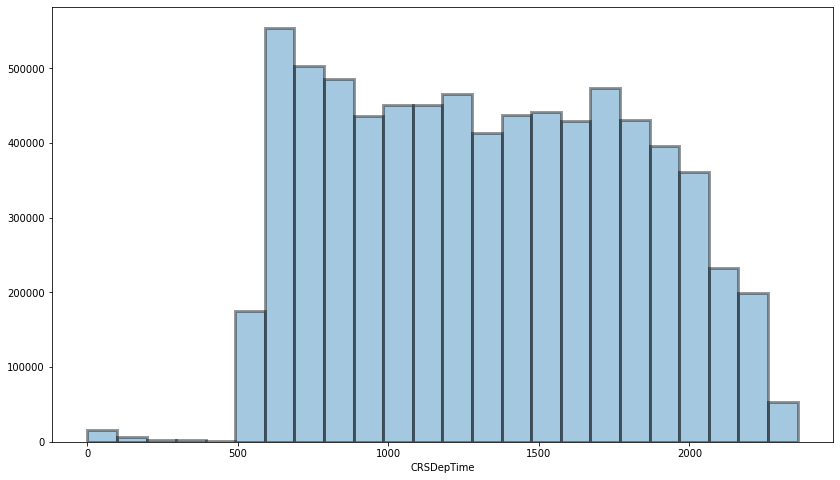

In [25]:
plt.figure(figsize=(14,8))
sns.distplot(df['CRSDepTime'],bins=24,kde=False,hist_kws={'linewidth':3,'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


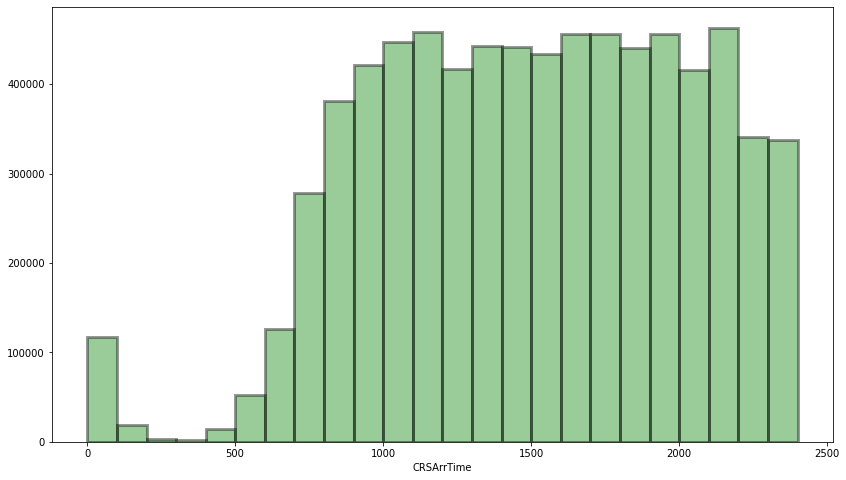

In [26]:
plt.figure(figsize=(14,8))
sns.distplot(df['CRSArrTime'],bins=24,kde=False,hist_kws={'color':'g','linewidth':3,'edgecolor':'black'})

In [32]:
# %%time
# df

# %%time
# df['Tail_Number'].value_counts()

# %%time
# df.groupby(by='Tail_Number')[['Year']].count().sort_values(by='Year',ascending=False)

# %%time
# sns.distplot(df['Distance'],)

In [30]:
#This operation is taking over 30 minutes.....
#sns.countplot(df[[x in df['Tail_Number'].value_counts()[:100].index.tolist() for x in df['Tail_Number']]])

In [31]:
#https://www.kaggle.com/python10pm/pandas-100-tricks

In [ ]:
#try to find amount of traffic near a tail number to get correlation with delays and taxi time....

In [ ]:
# print(df.groupby(['FlightDate','Origin','DepTimeBlk'])[['Year']].count())
# print(df.groupby(['FlightDate','Dest','ArrTimeBlk'])[['Year']].count())

A = df.groupby(['FlightDate','Origin','DepTimeBlk'])[['Year']].count()
B = df.groupby(['FlightDate','Dest','ArrTimeBlk'])[['Year']].count()

In [ ]:
Airport_Traffic = pd.concat([A,B],axis=1,ignore_index=True)
Airport_Traffic.index.set_names(['Date','Airport','TimeBlk'],inplace=True)
Airport_Traffic.fillna(0,inplace=True)
Airport_Traffic['Count'] = Airport_Traffic.loc[:,0] + Airport_Traffic.loc[:,1]
Airport_Traffic.drop([0,1],axis=1,inplace=True)
print(Airport_Traffic.sort_values(by='Count',ascending=False).head(20))

In [ ]:
df = pd.merge(df,Airport_Traffic,left_on=['FlightDate','Origin','DepTimeBlk'],right_index=True).rename({'Count':'TrafficDepBlk'},axis=1)
df = pd.merge(df,Airport_Traffic,left_on=['FlightDate','Dest','ArrTimeBlk'],right_index=True).rename({'Count':'TrafficArrBlk'},axis=1)

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df['ActualElapsedTime'].sort_values(ascending=False)

In [ ]:
df.loc[1388655]

In [ ]:
#from where do flights go to the bottom 3 least popular states like U.S. Pacific Trust Territories and Possessions 

In [ ]:
!pip install hvplot

In [ ]:
df.plot(backend='hvplot',kind = "hist")